In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head()

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [7]:
# color_palette returns all colors used.... below is just getting first one
base_color = sb.color_palette()[0]

In [21]:
# value counts gets the ordered value counts for each x value. Index just gets the index
gen_order = pokemon.generation_id.value_counts().index

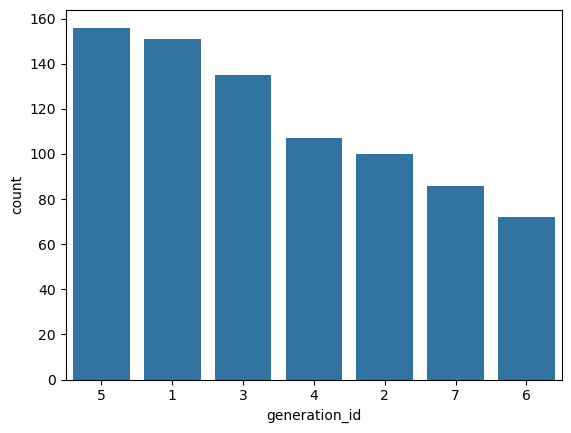

In [22]:
# adding semicolon at end supresses object information => <Axes: xlabel='generation_id', ylabel='count'>
sb.countplot(data=pokemon, x='generation_id', color=base_color, order=gen_order);

In [1]:
type1_order = pokemon.type_1.value_counts().index

NameError: name 'pokemon' is not defined

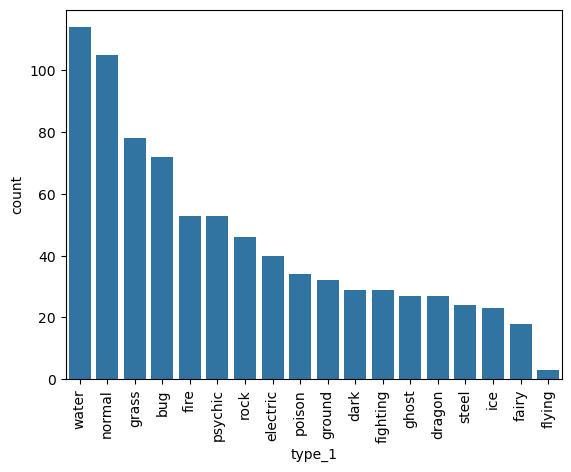

In [26]:
sb.countplot(data=pokemon, x='type_1', color=base_color, order=type1_order)
plt.xticks(rotation=90);

OR 

<Axes: xlabel='count', ylabel='type_1'>

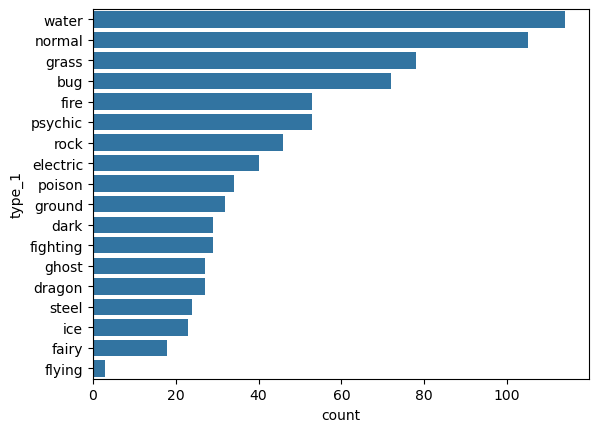

In [28]:
sb.countplot(data=pokemon, y='type_1', color=base_color, order=type1_order)

# Histograms Part II

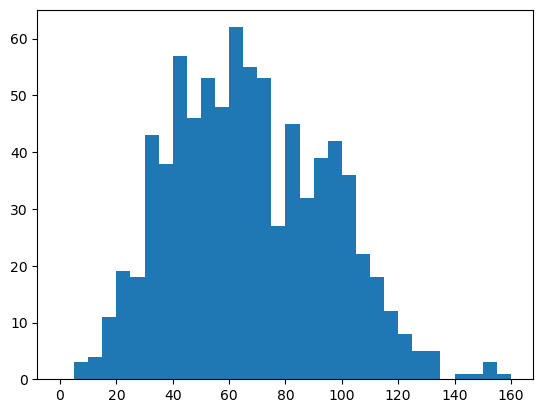

In [38]:
bins = np.arange(0, pokemon['speed'].max()+1, 5)
plt.hist(data=pokemon, x='speed', bins=bins);

/var/folders/hd/jwgpckjd2x129s8lwcqvhpth0000gn/T/ipykernel_86298/3728233534.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(pokemon['speed']);


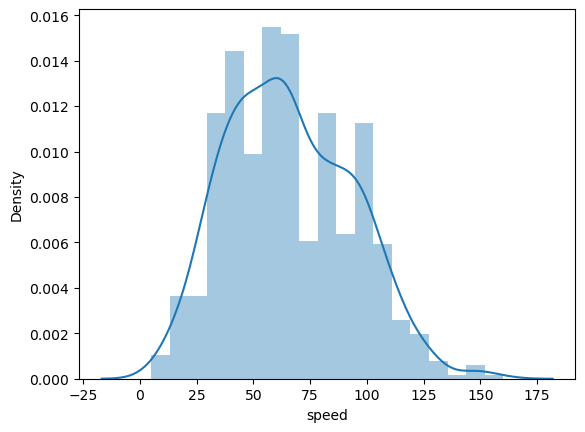

In [39]:
sb.distplot(pokemon['speed']);

<Axes: xlabel='speed', ylabel='Count'>

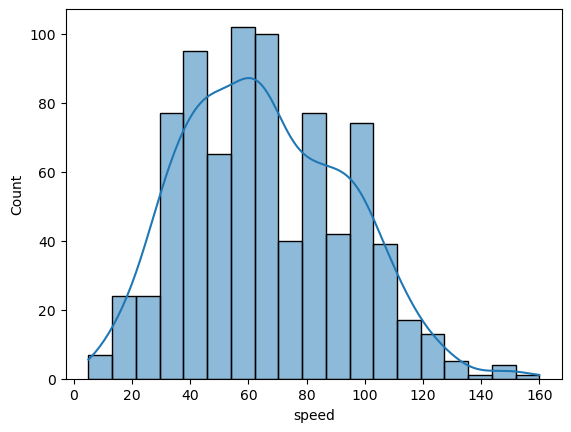

In [42]:
sb.histplot(pokemon["speed"], kde=True)

<Axes: xlabel='speed', ylabel='Density'>

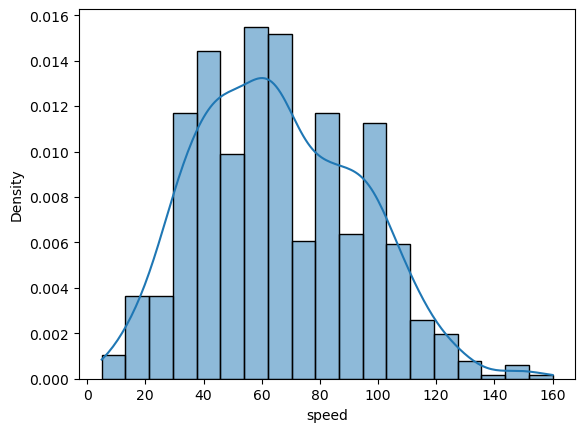

In [43]:
sb.histplot(pokemon["speed"], kde=True, stat="density")

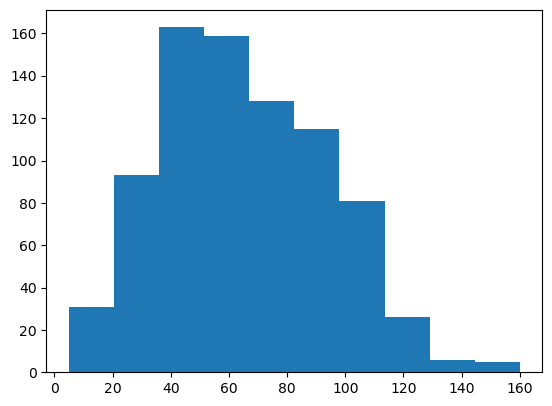

In [4]:
# Create a new figure
fig = plt.figure()

# The argument of add_axes represents the dimensions [left, bottom, width, height] of the new axes. 
# All quantities are in fractions of figure width and height.
ax = fig.add_axes([.125, .125, .775, .755])
ax.hist(data=pokemon, x='speed');

<Axes: xlabel='generation_id', ylabel='count'>

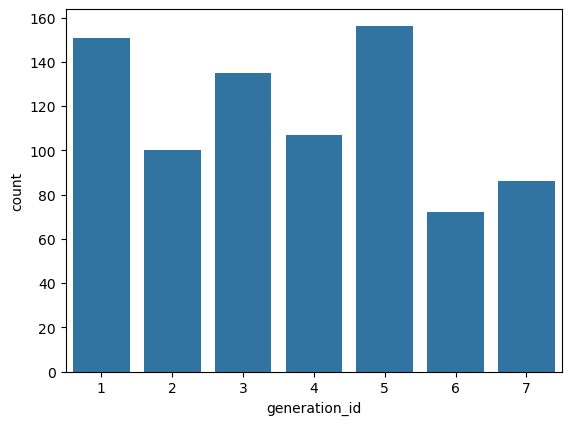

In [5]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, ax = ax)

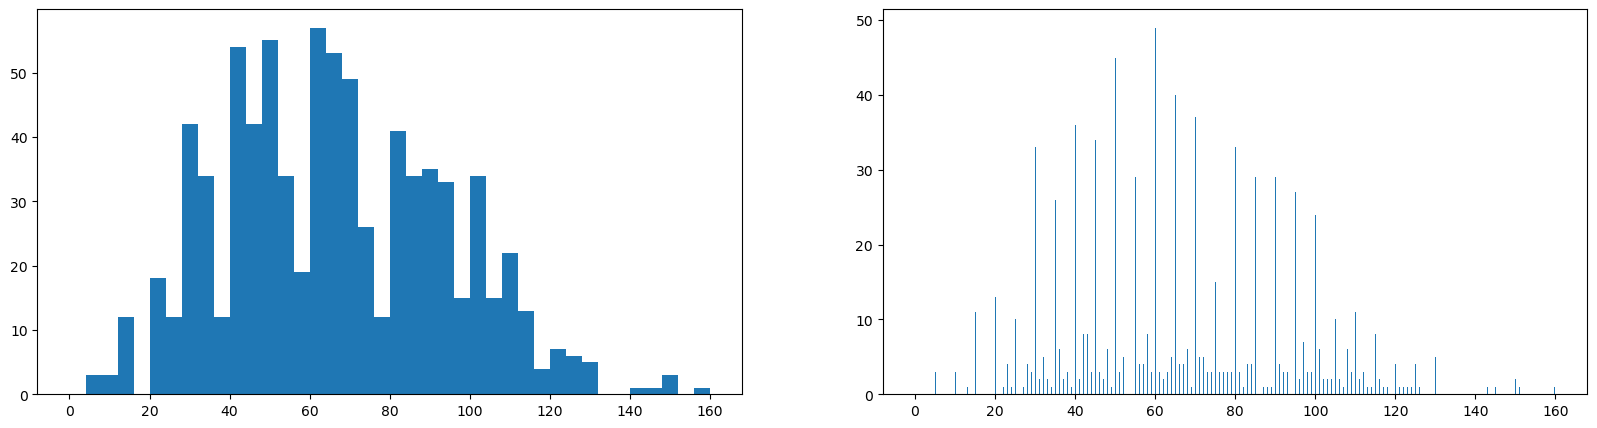

In [9]:
# SUB PLOTS
# Resize the chart, and have two plots side-by-side
# set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

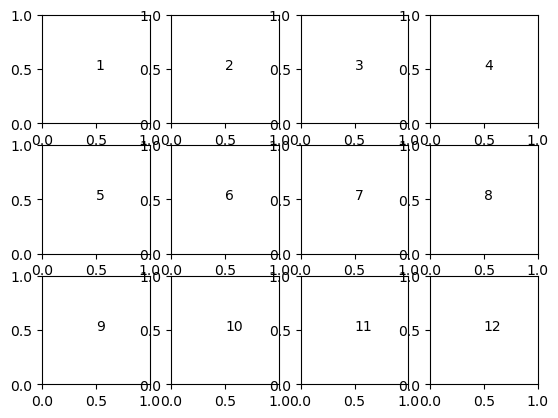

In [10]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes